In [84]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import cv2

data_dir = "../dataset/cropped_dataset_train"
target_size = (64, 64)
train_X = []
train_y = []

classes = sorted(os.listdir(data_dir))  
for label, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    if not os.path.isdir(class_dir):
        continue
    for fname in os.listdir(class_dir):
        fpath = os.path.join(class_dir, fname)
        try:
            img = load_img(fpath, target_size=target_size)
            img_array = img_to_array(img)
            train_X.append(img_array)
            train_y.append(label)
        except Exception as e:
            print(f"Skipping {fpath}: {e}")

X_train = np.array(train_X) / 255.0

y_train = np.array(train_y)
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

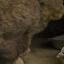

In [44]:
import matplotlib.pyplot as plt
import PIL
PIL.Image.fromarray((train_X[6]).astype(np.uint8))

In [87]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

augmentor = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
X_resized = np.array([tf.image.resize(img, (64, 64)).numpy() for img in X_train])


augmented_data_train = augmentor.flow(X_resized, y_train, batch_size=32, shuffle=True)
print(len(augmented_data_train))
augmented_data_train[0][1]  # Number of batches in the augmented data

24


array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [88]:

data_dir = "../dataset/cropped_dataset_val"
target_size = (224, 224)
val_X = []
val_y = []

classes = sorted(os.listdir(data_dir))  
for label, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    if not os.path.isdir(class_dir):
        continue
    for fname in os.listdir(class_dir):
        fpath = os.path.join(class_dir, fname)
        try:
            img = load_img(fpath, target_size=target_size)
            img_array = img_to_array(img)
            val_X.append(img_array)
            val_y.append(label)
        except Exception as e:
            print(f"Skipping {fpath}: {e}")

x_val = np.array(val_X) / 255.0
y_val = np.array(val_y)


In [89]:
X_resized_val = np.array([tf.image.resize(img, (64, 64)).numpy() for img in x_val])

augmented_data_val = augmentor.flow(X_resized_val, y_val, batch_size=32, shuffle=True)

len(augmented_data_val) 

4

This custom CNN is not Good For this Size Images

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

def build_small_cnn():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(GlobalAveragePooling2D())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=0.0005),
        metrics=['accuracy']
    )
    
    return model
model = build_small_cnn()

C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,785 (432.75 KB)

 Trainable params: 110,337 (431.00 KB)

 Non-trainable params: 448 (1.75 KB)

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

current_dir = os.getcwd()

file_path = os.path.join(current_dir, 'custom_model.keras')

checkpoint = ModelCheckpoint(filepath=file_path, monitor='val_loss', save_best_only=True, save_weights_only=False, verbose=1)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=6, verbose=1)

early_stopping = EarlyStopping(monitor='val_accuracy', verbose=1, patience=6)

callbacks = [checkpoint, reduce_learning_rate]


In [20]:
history = model.fit(augmented_data_train,validation_data=augmented_data_val, epochs=25, batch_size=32, validation_split=0.2, callbacks = callbacks)

Epoch 1/25


C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4260 - loss: 0.0000e+00
Epoch 1: val_loss improved from inf to 0.00000, saving model to d:\Tasks\Animal and Human Detection\models\custom_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.4257 - loss: 0.0000e+00 - val_accuracy: 0.7778 - val_loss: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 2/25
17/25 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4414 - loss: 0.0000e+00

KeyboardInterrupt: 

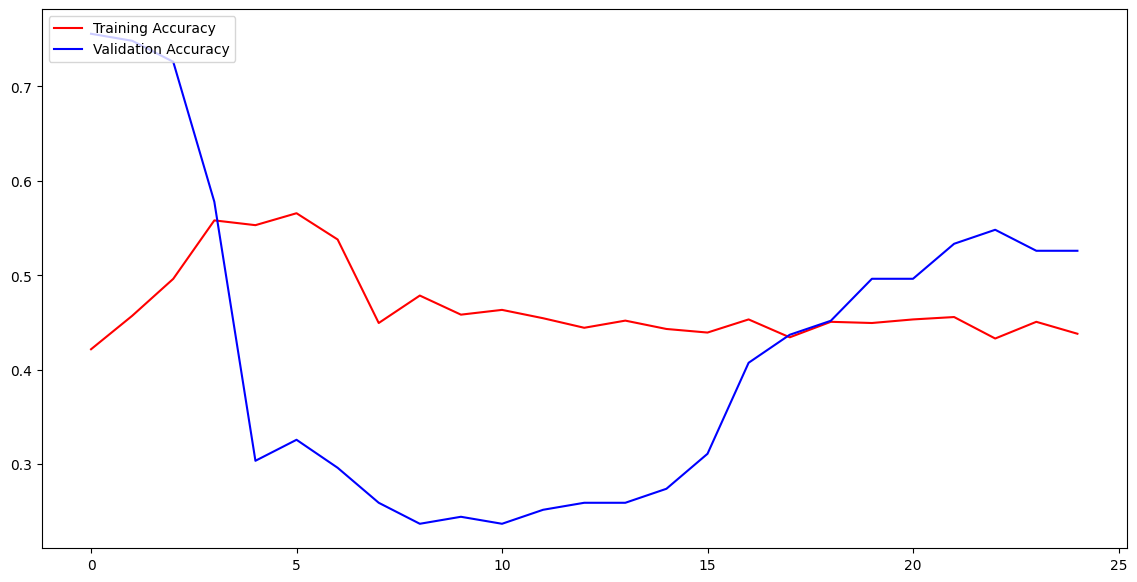

In [62]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()


In [63]:
import pandas as pd
hist_=pd.DataFrame(history.history)
hist_

,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.421717,0.0,0.755556,0.0,5.000000e-04
1,0.457071,0.0,0.748148,0.0,5.000000e-04
2,0.496212,0.0,0.725926,0.0,5.000000e-04
3,0.558081,0.0,0.577778,0.0,5.000000e-04
4,0.553030,0.0,0.303704,0.0,5.000000e-04
5,0.565657,0.0,0.325926,0.0,5.000000e-04
6,0.537879,0.0,0.296296,0.0,5.000000e-04
7,0.449495,0.0,0.259259,0.0,5.000000e-05
8,0.478535,0.0,0.237037,0.0,5.000000e-05
9,0.458333,0.0,0.244444,0.0,5.000000e-05


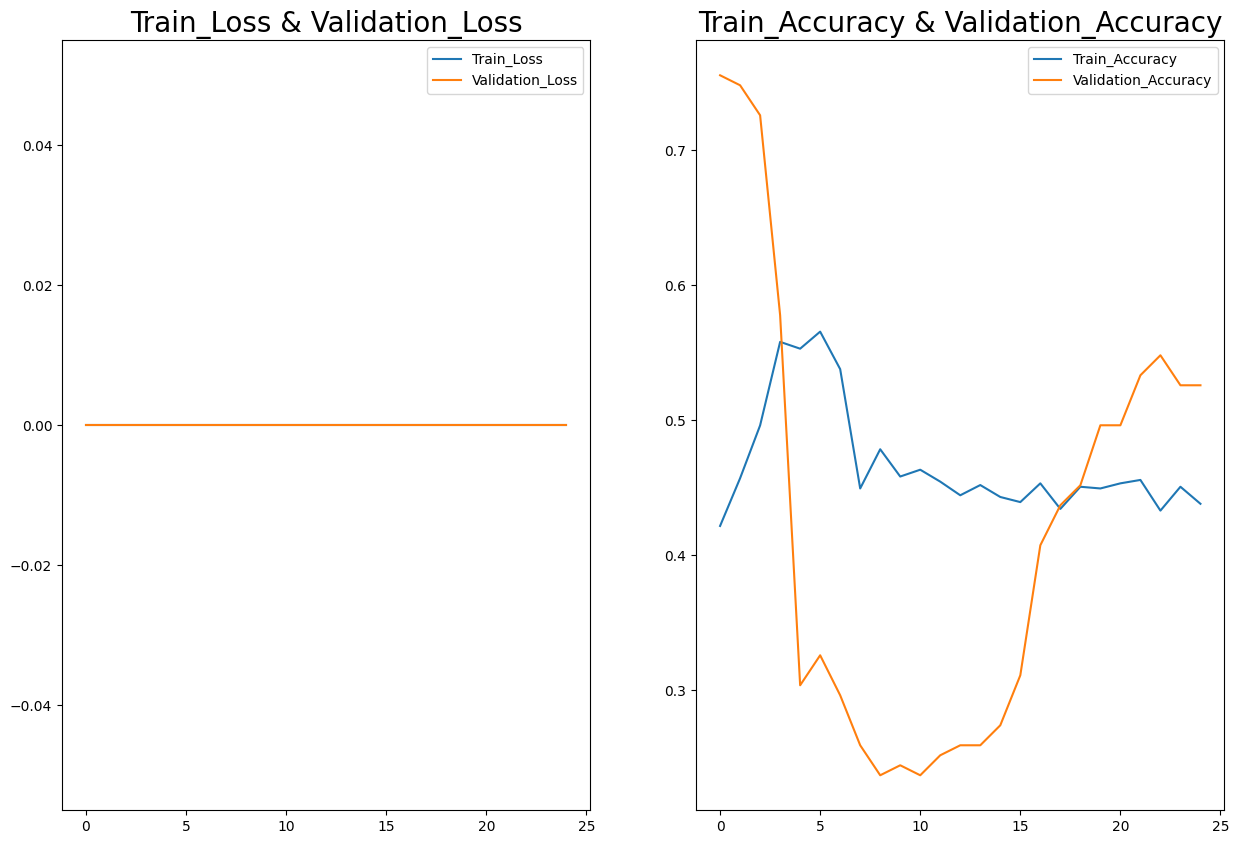

In [64]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()
plt.show()

In [65]:

loss, acc = model.evaluate(augmented_data_val)
print(f"Validation Accuracy: {acc:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.5754 - loss: 0.0000e+00
Validation Accuracy: 0.58


In [42]:
import cv2
import os
import numpy as np
from pathlib import Path
from ultralytics import YOLO
yolo_model = YOLO("yolo_model_trained.pt")  # Load the YOLO model

def expand_box_to_min_size(x1, y1, x2, y2, img_width, img_height, min_size=64):
    w, h = x2 - x1, y2 - y1
    cx, cy = (x1 + x2) // 2, (y1 + y2) // 2

    # Ensure width and height are at least `min_size`
    new_w = max(w, min_size)
    new_h = max(h, min_size)

    x1_new = max(cx - new_w // 2, 0)
    y1_new = max(cy - new_h // 2, 0)
    x2_new = min(cx + new_w // 2, img_width)
    y2_new = min(cy + new_h // 2, img_height)

    return int(x1_new), int(y1_new), int(x2_new), int(y2_new)

def crop_and_save_images(yolo_model, input_dir, output_dir):
    input_dir = Path(input_dir)
    output_dir = Path(output_dir)
    output_dir.mkdir(parents=True, exist_ok=True)

    image_files = list(input_dir.rglob("*.jpg"))

    if not image_files:
        print(f"No images found in: {input_dir}")
        return

    for img_path in image_files:
        img = cv2.imread(str(img_path))
        if img is None:
            print(f"Failed to read: {img_path}")
            continue

        img_h, img_w = img.shape[:2]
        results = yolo_model(img)
        boxes = results[0].boxes

        if boxes is None or boxes.xyxy.shape[0] == 0:
            continue

        for i, box in enumerate(boxes.xyxy.cpu().numpy()):
            x1, y1, x2, y2 = map(int, box)
            label = int(boxes.cls[i].item())
            label_name = "human" if label == 0 else "animal"

            # Expand box if needed
            x1_new, y1_new, x2_new, y2_new = expand_box_to_min_size(x1, y1, x2, y2, img_w, img_h)

            crop = img[y1_new:y2_new, x1_new:x2_new]

            label_dir = output_dir / label_name
            label_dir.mkdir(parents=True, exist_ok=True)

            out_path = label_dir / f"{img_path.stem}_{i}.jpg"
            cv2.imwrite(str(out_path), crop)

# Example usage
crop_and_save_images(yolo_model, r"../dataset/dataset_yolo/images/train", r"../dataset/cropped_dataset_train")
crop_and_save_images(yolo_model, r"../dataset/dataset_yolo/images/val", r"../dataset/cropped_dataset_val")


0: 640x480 1 Human head, 8.0ms
Speed: 1.4ms preprocess, 8.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

0: 512x640 2 Human heads, 6.2ms
Speed: 1.7ms preprocess, 6.2ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)

0: 384x640 1 Animal, 7.3ms
Speed: 1.9ms preprocess, 7.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 640x448 1 Human head, 5.9ms
Speed: 1.4ms preprocess, 5.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)

0: 640x480 1 Human head, 6.5ms
Speed: 1.6ms preprocess, 6.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

0: 544x640 1 Human head, 7.1ms
Speed: 3.8ms preprocess, 7.1ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Human head, 11.8ms
Speed: 3.7ms preprocess, 11.8ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)

0: 480x640 1 Human head, 5.8ms
Speed: 1.4ms preprocess, 5.8ms inference, 1.5ms postprocess per image at s

Let`s Try Mobilenetv2

In [48]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.optimizers import Adam

input_shape = (64, 64, 3)

base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

base_model.trainable = False

inputs = Input(shape=input_shape)
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\dsmat\AppData\Local\Temp\ipykernel_10804\3704148552.py:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 2, 2, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [49]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

current_dir = os.getcwd()

file_path = os.path.join(current_dir, 'custom_model.keras')

checkpoint = ModelCheckpoint(filepath=file_path, monitor='val_loss', save_best_only=True, save_weights_only=False, verbose=1)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=6, verbose=1)

early_stopping = EarlyStopping(monitor='val_accuracy', verbose=1, patience=6)

callbacks = [checkpoint, reduce_learning_rate, early_stopping]


In [50]:
history = model.fit(augmented_data_train,validation_data=augmented_data_val, epochs=100, batch_size=32, validation_split=0.2, callbacks = callbacks)

Epoch 1/100
 4/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5091 - loss: 0.8313

C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/24 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4921 - loss: 0.8350
Epoch 1: val_loss improved from inf to 0.62322, saving model to d:\Tasks\Animal and Human Detection\models\custom_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.4913 - loss: 0.8368 - val_accuracy: 0.6509 - val_loss: 0.6232 - learning_rate: 1.0000e-04
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5571 - loss: 0.7876
Epoch 2: val_loss did not improve from 0.62322
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5572 - loss: 0.7867 - val_accuracy: 0.6226 - val_loss: 0.6855 - learning_rate: 1.0000e-04
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5799 - loss: 0.7640
Epoch 3: val_loss improved from 0.62322 to 0.58629, saving model to d:\Tasks\Animal and Human Detection\models\custom_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5808 - loss: 0.7635 - val_accuracy: 0.6792 - val_loss: 0.5863 - learning_rate: 1.0000e-04
Epoch 4/100
22/24 ━

In [22]:
len(augmented_data_train[0][0][0])

64

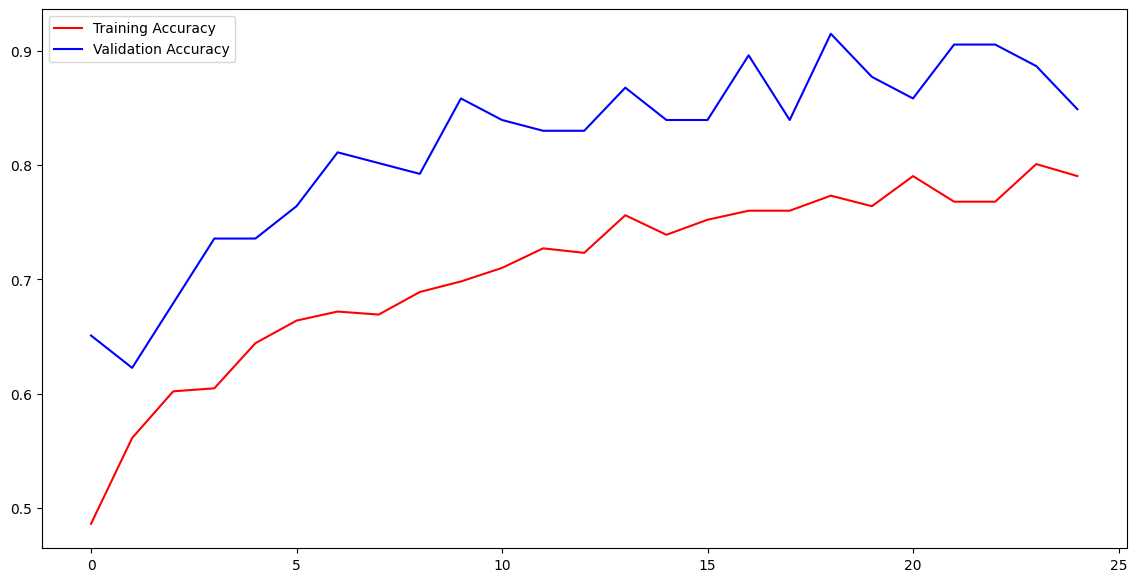

In [51]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()


In [94]:
loss, acc = model.evaluate(augmented_data_val)
print(f"Validation Accuracy: {acc:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8776 - loss: 0.2682
Validation Accuracy: 0.87


C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


{0: "Animal",
1 : "Human" 
}

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step


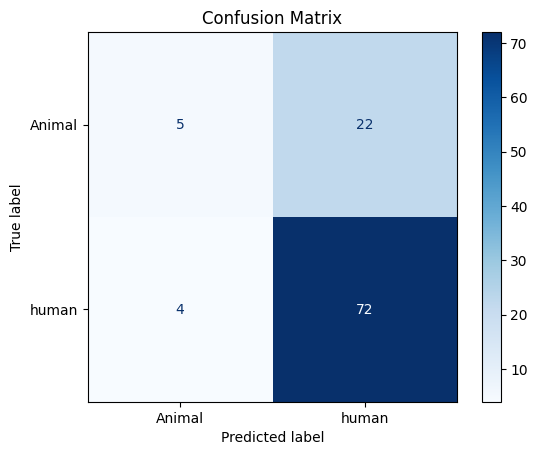

In [90]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
pred_probs = model.predict(x_val)
y_pred = [1 if pred_prob> 0.5 else  0 for pred_prob in pred_probs]
class_labels = ["Animal" , "human"]
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [92]:
classification_report(y_val, y_pred, target_names=class_labels, output_dict=True)

{'Animal': {'precision': 0.5555555555555556,
  'recall': 0.18518518518518517,
  'f1-score': 0.2777777777777778,
  'support': 27.0},
 'human': {'precision': 0.7659574468085106,
  'recall': 0.9473684210526315,
  'f1-score': 0.8470588235294118,
  'support': 76.0},
 'accuracy': 0.7475728155339806,
 'macro avg': {'precision': 0.6607565011820331,
  'recall': 0.5662768031189084,
  'f1-score': 0.5624183006535948,
  'support': 103.0},
 'weighted avg': {'precision': 0.7108035529849205,
  'recall': 0.7475728155339806,
  'f1-score': 0.697829811536265,
  'support': 103.0}}

In [93]:
model.save('animal_human_classifier.h5')